In [1]:
import os
import numpy as np
import pandas as pd
import pickle 
import quandl
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [2]:
quandl.ApiConfig.api_key = 'Jc2CQb3xRbEwzkLUBjaX'

In [3]:
def get_quandl_data(quandl_code):
    cache_path = '{}.pkl'.format(quandl_code).replace('/', '-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)
        print('Loaded {} from cache'.format(quandl_code))
    except (OSError, IOError) as e:
        df = quandl.get(quandl_code, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_code, cache_path))
    return df

In [4]:
btc_usd_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

Loaded BCHARTS/KRAKENUSD from cache


In [5]:
btc_usd_kraken.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
2024-01-01,31236.203565,34250.720572,29982.624431,33309.965914,999.472353,3.329239e+07,32514.436972
2024-01-02,48521.429192,52960.245120,45953.475650,48406.722627,143.390835,6.941080e+06,49106.814466
2024-01-03,41959.818254,43118.798876,39118.918000,39350.281816,979.456766,3.854190e+07,40529.332897
2024-01-04,37959.754526,38576.316487,37160.627621,38532.575425,466.217165,1.796455e+07,38089.839844
2024-01-05,24680.559213,25151.217974,23084.222116,24911.003880,883.678105,2.201331e+07,24382.147990


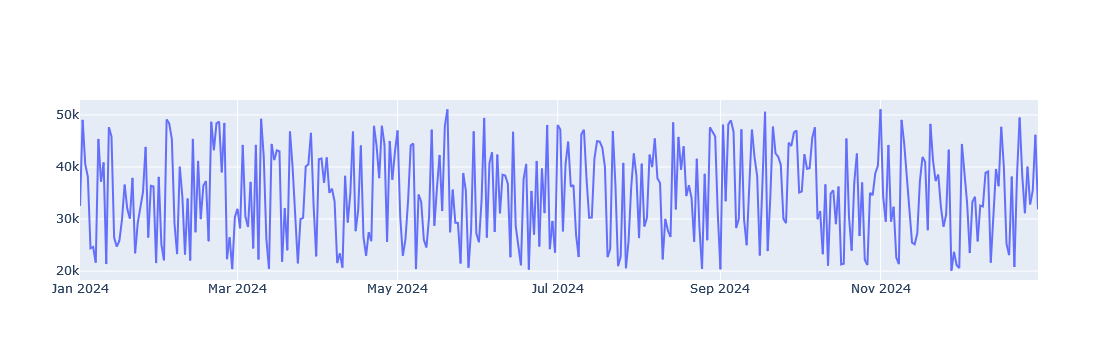

In [6]:
btc_trace = go.Scatter(x=btc_usd_kraken.index, y=btc_usd_kraken['Weighted Price'])
py.iplot([btc_trace])

In [7]:
exchanges = ['COINBASE', 'BITSTAMP', 'ITBIT']

exchange_data = {}
exchange_data['KRAKEN'] = btc_usd_kraken

for exchange in exchanges:
    exchange_code = 'BCHARTS/{}USD'.format(exchange)
    btc_exchange_df = get_quandl_data(exchange_code)
    exchange_data[exchange] = btc_exchange_df

Loaded BCHARTS/COINBASEUSD from cache
Loaded BCHARTS/BITSTAMPUSD from cache
Loaded BCHARTS/ITBITUSD from cache


In [8]:
def merge_dfs(dataframes, labels, col):
    series_dict = {}
    
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
    return pd.DataFrame(series_dict)

In [9]:
btc_usd_df = merge_dfs(list(exchange_data.values()), list(exchange_data.keys()), 'Weighted Price')

In [10]:
btc_usd_df.tail()

,KRAKEN,COINBASE,BITSTAMP,ITBIT
2024-12-27,40125.126272,40125.126272,40125.126272,NaN
2024-12-28,32757.236978,32757.236978,32757.236978,NaN
2024-12-29,35488.207230,35488.207230,35488.207230,NaN
2024-12-30,46244.350640,46244.350640,46244.350640,NaN
2024-12-31,31861.253328,31861.253328,31861.253328,NaN


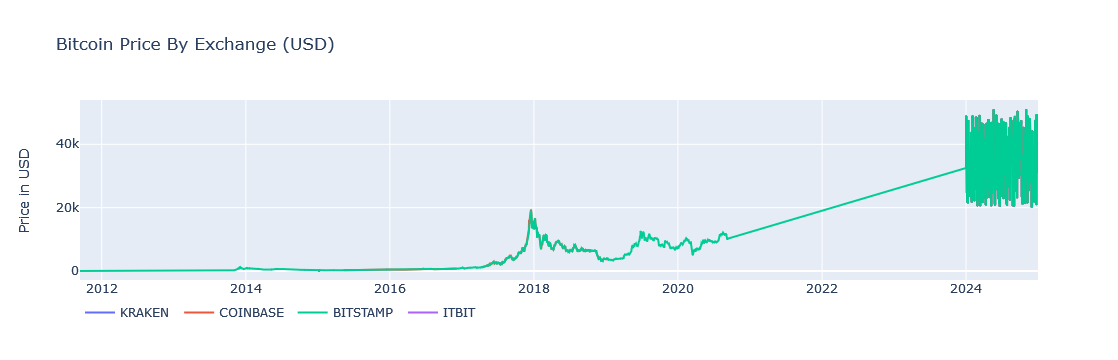

In [11]:
layout = go.Layout(
    title = 'Bitcoin Price By Exchange (USD)',
    legend = {'orientation': 'h'},
    xaxis = {'type': 'date'},
    yaxis = {'title': 'Price in USD'}
)

trace_arr = []
labels = list(btc_usd_df)
for index, label in enumerate(labels):
    series = btc_usd_df[label]
    trace = go.Scatter(x=series.index, y=series, name=label)
    trace_arr.append(trace)
    
fig = go.Figure(data=trace_arr, layout=layout)
py.iplot(fig)

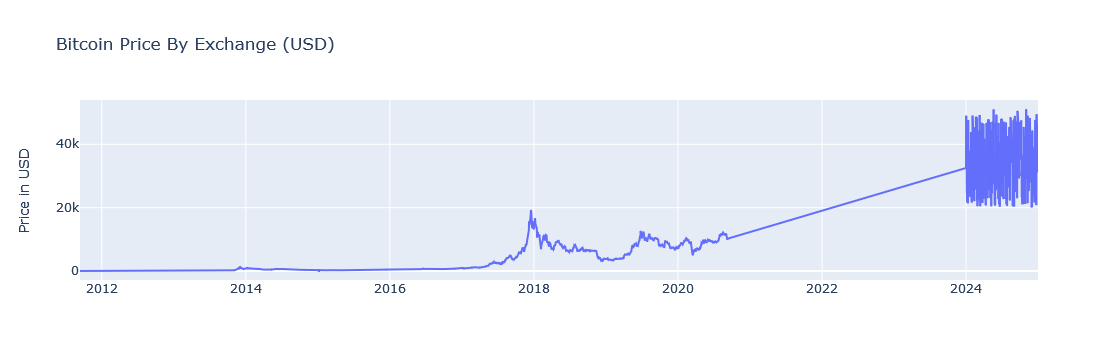

In [12]:
btc_usd_df['avg_usd_price'] = btc_usd_df.mean(axis=1)
btc_trace = go.Scatter(x=btc_usd_df.index, y=btc_usd_df['avg_usd_price'])

fig = go.Figure(data=[btc_trace], layout=layout)
py.iplot(fig)

In [13]:
import chart_studio
import chart_studio.plotly as cs_py
chart_studio.tools.set_credentials_file(username='tusharlawande', api_key='rzH4qdKYGdgkiwreoVUN')
cs_py.plot(fig, filename='Bitcoin USD Prices', auto_open=True)


'https://plotly.com/~tusharlawande/1/'